### Import Necessary Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.374540,0.261706,0.571996,0.648257,72.026792,37.364082,65.430632,7.317510,0.004402,0.645691,0.729998,0.764636,-6.823459,stable
1,0.950714,0.246979,0.805432,0.172386,68.728300,33.291210,8.003257,8.947838,0.000330,0.402418,0.184512,0.006516,-2.556660,stable
2,0.731994,0.906255,0.760161,0.872395,9.575420,17.615391,24.232981,65.197371,0.472263,0.471909,0.346640,0.477050,-0.723214,stable
3,0.598658,0.249546,0.153900,0.613116,92.257240,60.726667,77.367935,48.694071,0.029294,0.716725,0.663281,0.793904,-7.130935,stable
4,0.156019,0.271950,0.149249,0.157204,56.847220,47.662416,52.868585,79.041525,0.974533,0.876306,0.482089,0.630045,0.455851,unstable


### Flowchart of this Process

![Flow Chart](Flowchart_page-0001.jpg)

### Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    2000 non-null   float64
 1   tau2    2000 non-null   float64
 2   tau3    2000 non-null   float64
 3   tau4    2000 non-null   float64
 4   p1      2000 non-null   float64
 5   p2      2000 non-null   float64
 6   p3      2000 non-null   float64
 7   p4      2000 non-null   float64
 8   g1      2000 non-null   float64
 9   g2      2000 non-null   float64
 10  g3      2000 non-null   float64
 11  g4      2000 non-null   float64
 12  stab    2000 non-null   float64
 13  stabf   2000 non-null   object 
dtypes: float64(13), object(1)
memory usage: 218.9+ KB


#### Changing the Values to Numerical

In [4]:
df.replace({
    "stabf":{
        "stable":0,
        "unstable":1
    }
},inplace=True)

df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.374540,0.261706,0.571996,0.648257,72.026792,37.364082,65.430632,7.317510,0.004402,0.645691,0.729998,0.764636,-6.823459,0
1,0.950714,0.246979,0.805432,0.172386,68.728300,33.291210,8.003257,8.947838,0.000330,0.402418,0.184512,0.006516,-2.556660,0
2,0.731994,0.906255,0.760161,0.872395,9.575420,17.615391,24.232981,65.197371,0.472263,0.471909,0.346640,0.477050,-0.723214,0
3,0.598658,0.249546,0.153900,0.613116,92.257240,60.726667,77.367935,48.694071,0.029294,0.716725,0.663281,0.793904,-7.130935,0
4,0.156019,0.271950,0.149249,0.157204,56.847220,47.662416,52.868585,79.041525,0.974533,0.876306,0.482089,0.630045,0.455851,1


In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.498637,0.496390,0.496285,0.487840,49.164584,50.547164,49.551958,49.794205,0.510665,0.513051,0.508008,0.515233,-0.062903,0.493000
std,0.292211,0.288580,0.287941,0.287314,28.217030,29.127993,29.081468,29.029721,0.284656,0.289257,0.291567,0.286332,4.679082,0.500076
min,0.003218,0.000012,0.000031,0.000241,0.005283,0.015774,0.120361,0.030973,0.000252,0.000612,0.000048,0.000510,-13.004189,0.000000
25%,0.238046,0.250787,0.246935,0.239330,25.326233,25.286952,23.754445,24.464226,0.273418,0.268687,0.256910,0.274941,-3.511995,0.000000
50%,0.507351,0.492694,0.491511,0.484199,48.670383,50.321888,48.788070,49.619863,0.521961,0.511187,0.516189,0.514333,-0.120320,0.000000
75%,0.750679,0.748691,0.739852,0.737134,72.968372,76.272734,75.295201,75.924614,0.747003,0.757391,0.759681,0.764699,3.263043,1.000000
max,0.999718,0.999558,0.999350,0.999461,99.950519,99.967321,99.884483,99.992483,0.999150,0.999871,0.999901,0.998793,13.138920,1.000000


### Exploratory Data Analysis

#### Histogram

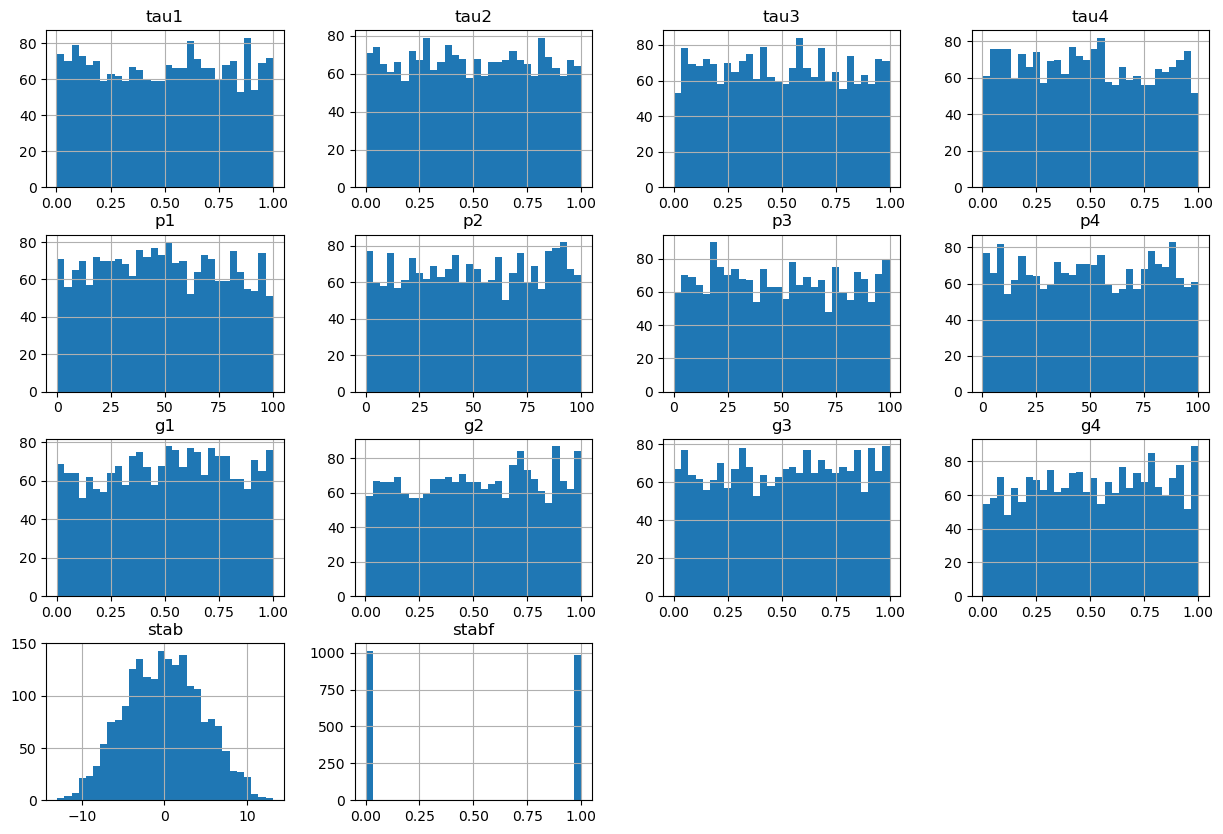

In [6]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

#### Density Plot

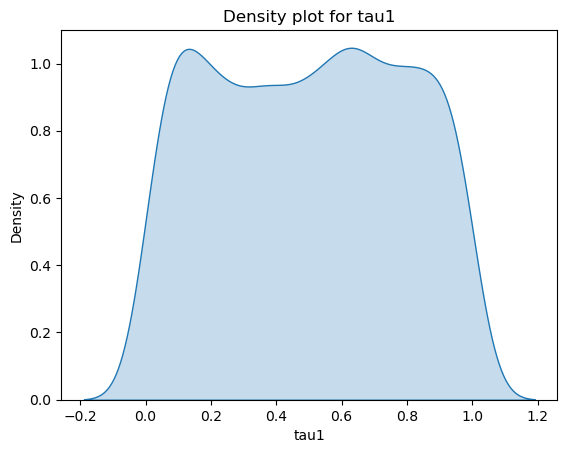

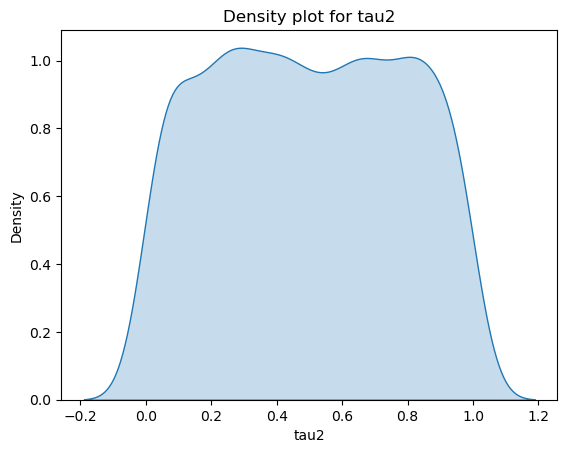

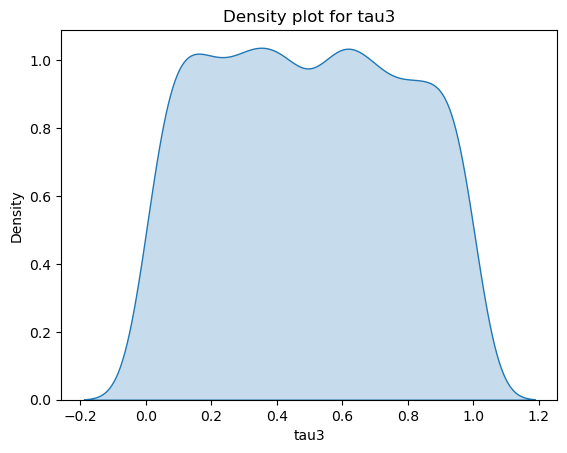

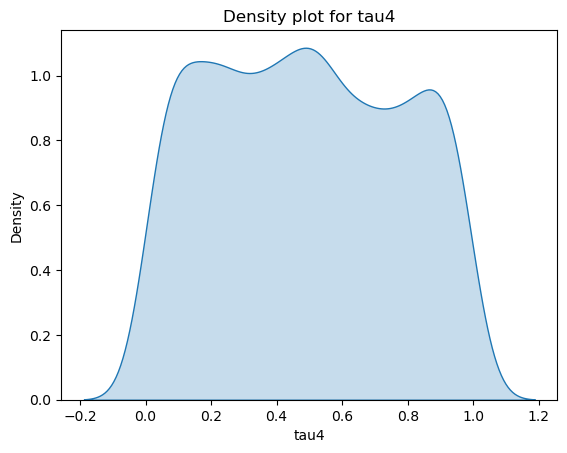

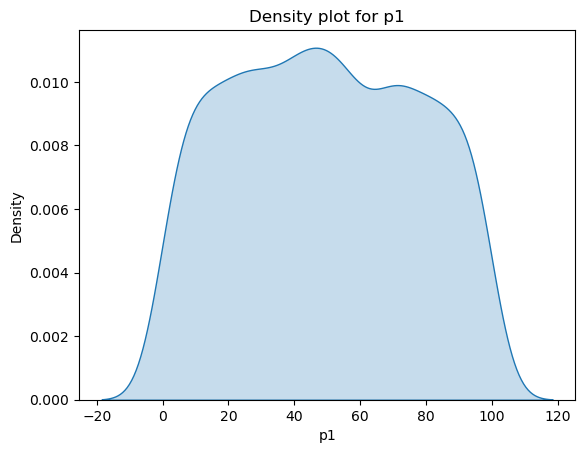

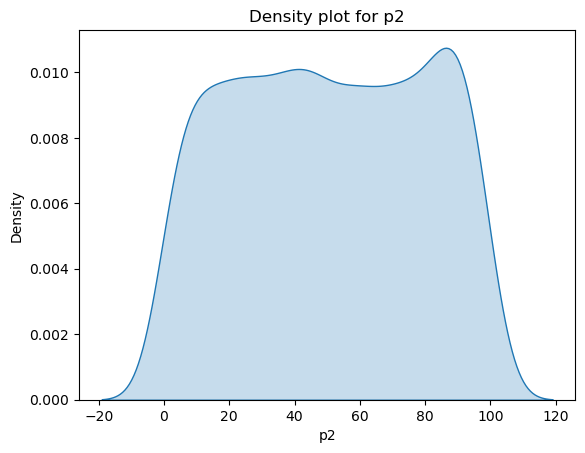

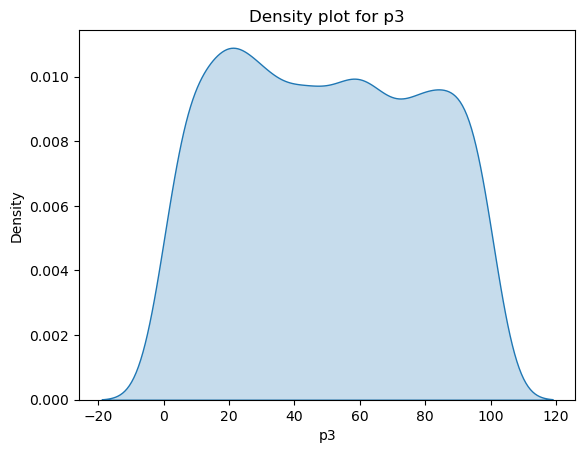

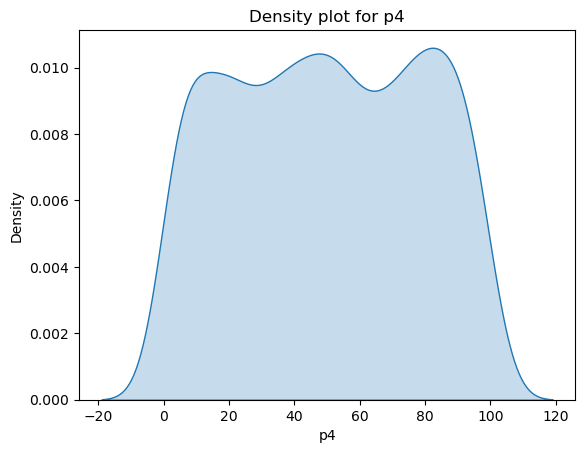

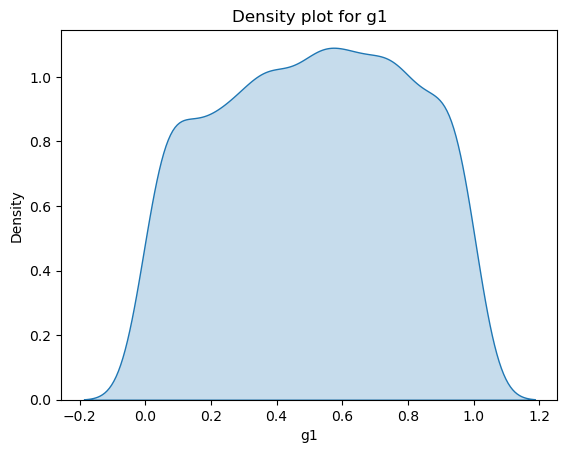

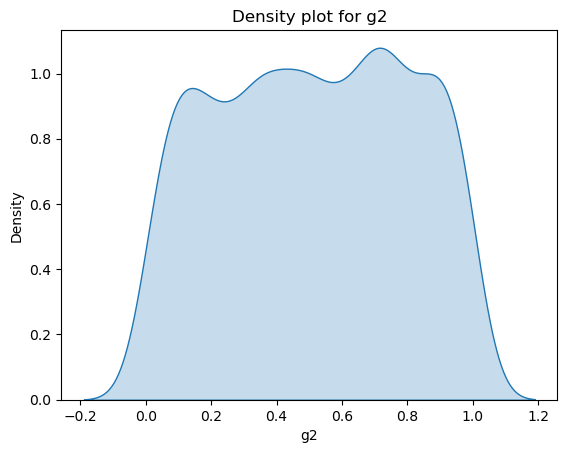

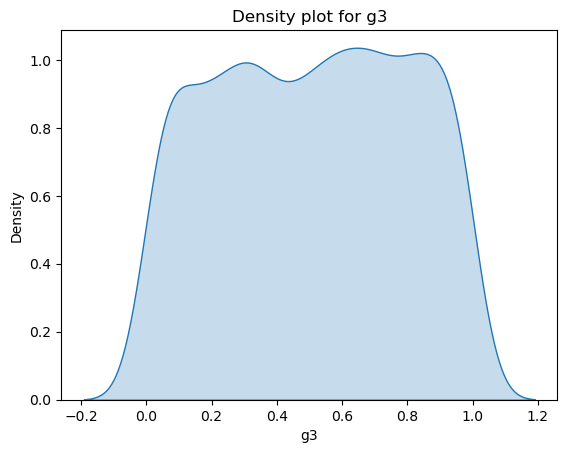

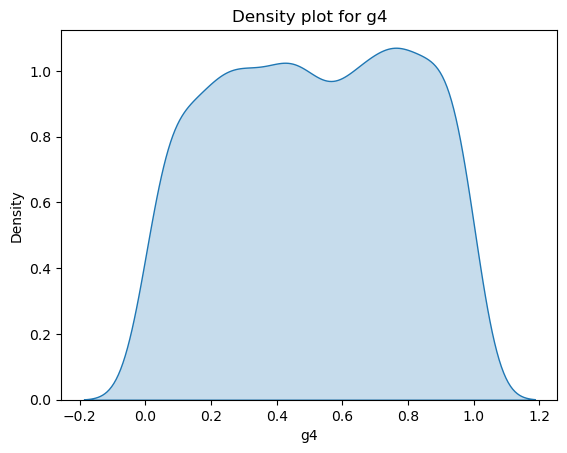

In [7]:
for column in df.columns[:-2]:
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density plot for {column}')
    plt.show()

#### Correlation Matrix

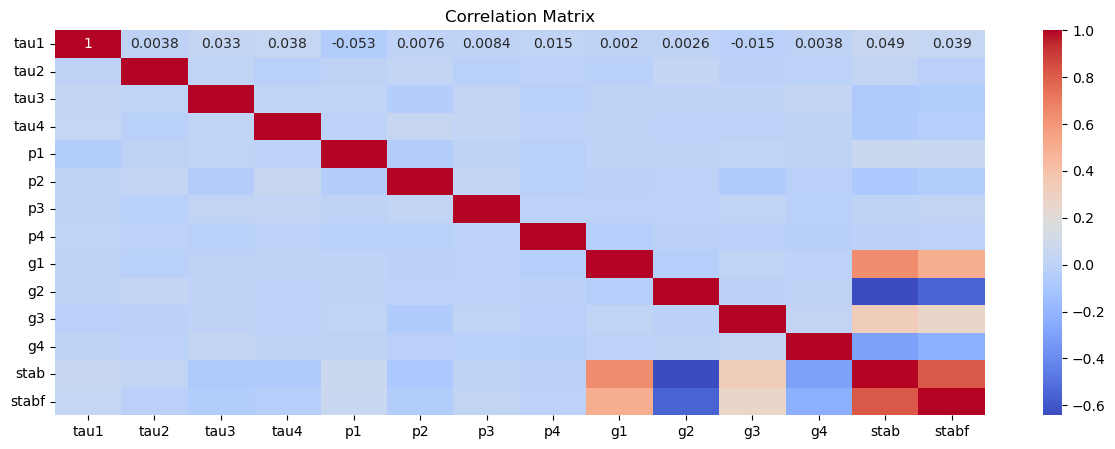

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Stability score and label distribution

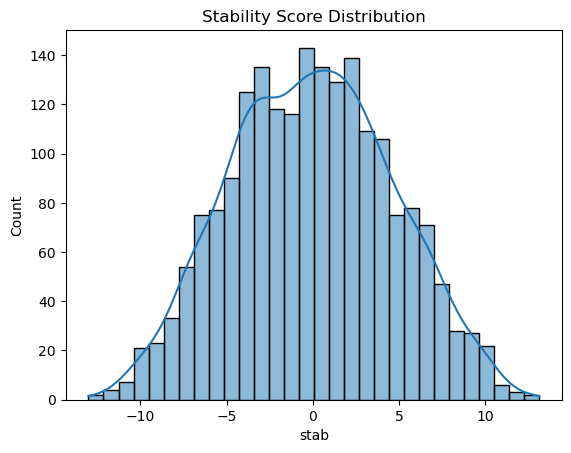

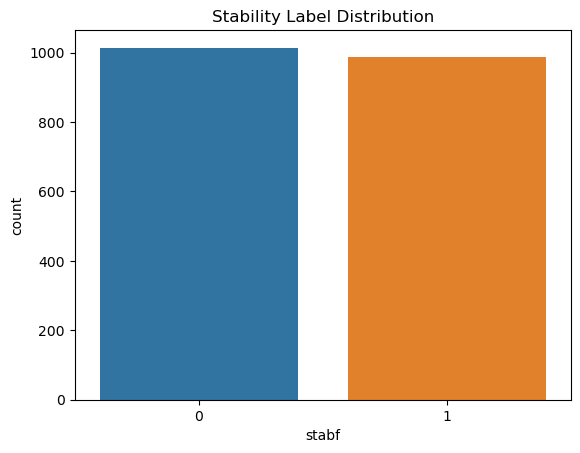

In [9]:
sns.histplot(df['stab'], bins=30, kde=True)
plt.title('Stability Score Distribution')
plt.show()

sns.countplot(x='stabf', data=df)
plt.title('Stability Label Distribution')
plt.show()

#### Relationship with Stability Score and Label

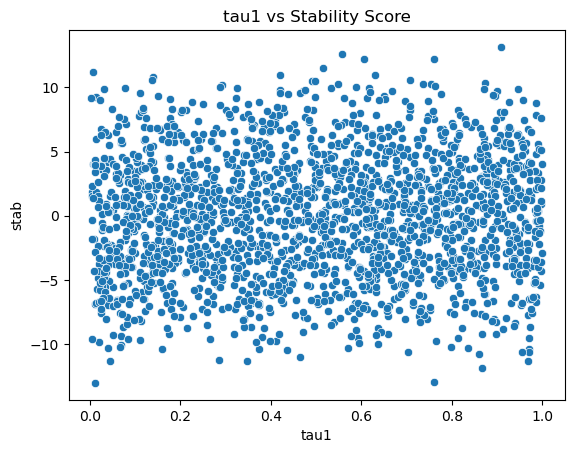

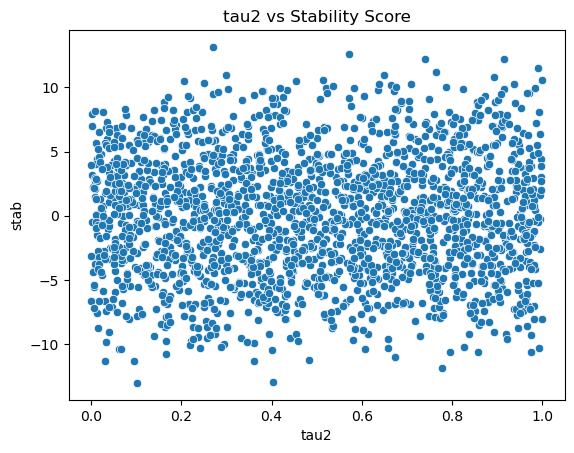

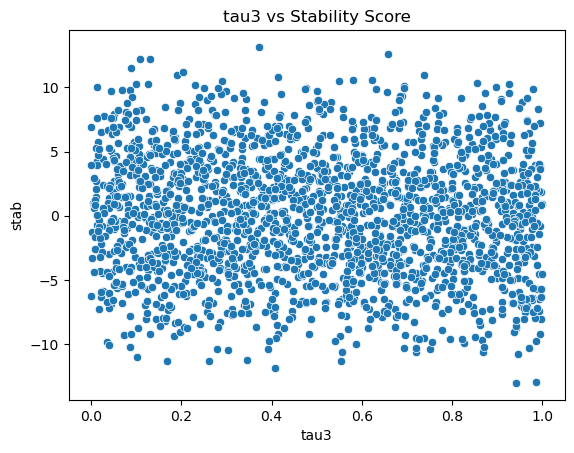

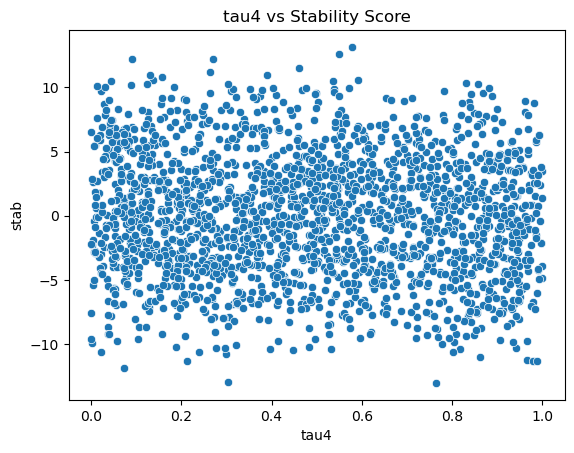

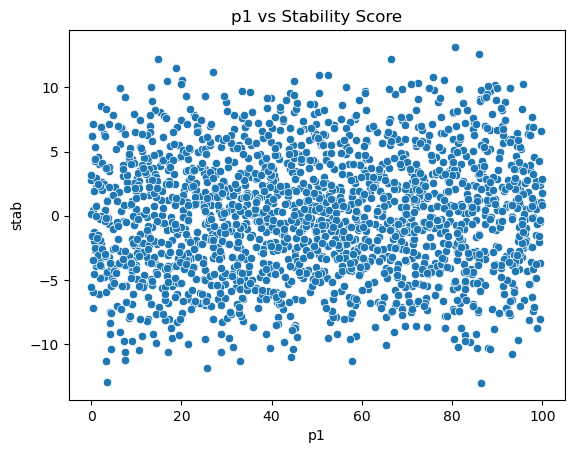

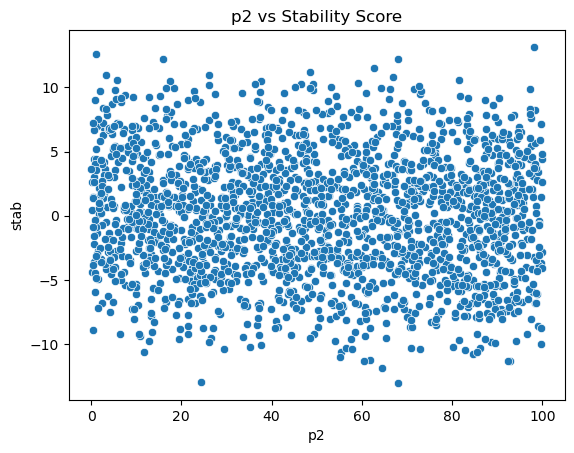

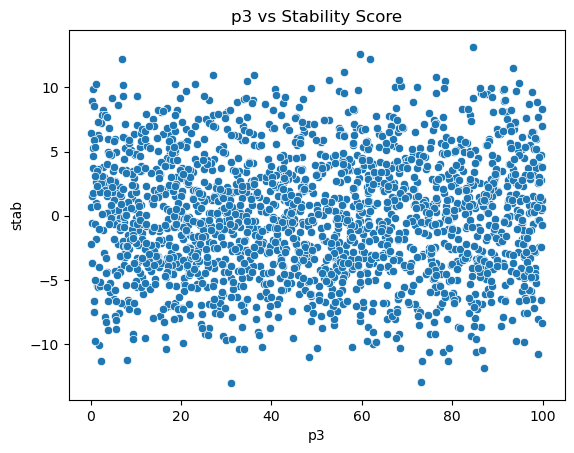

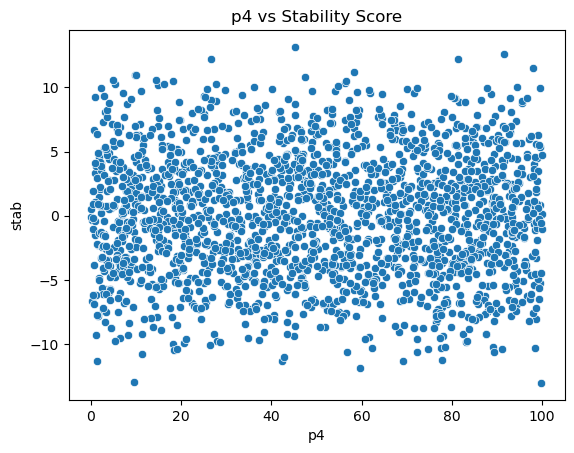

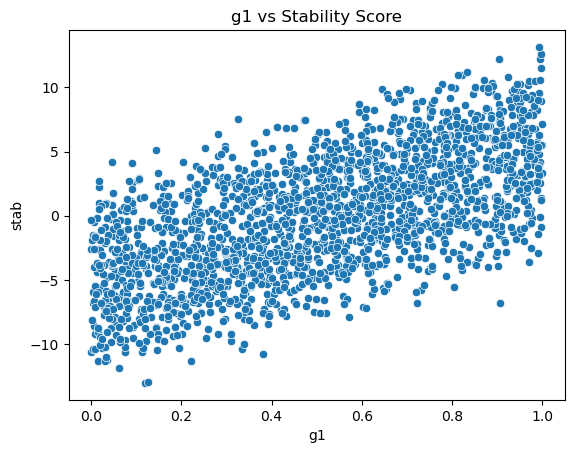

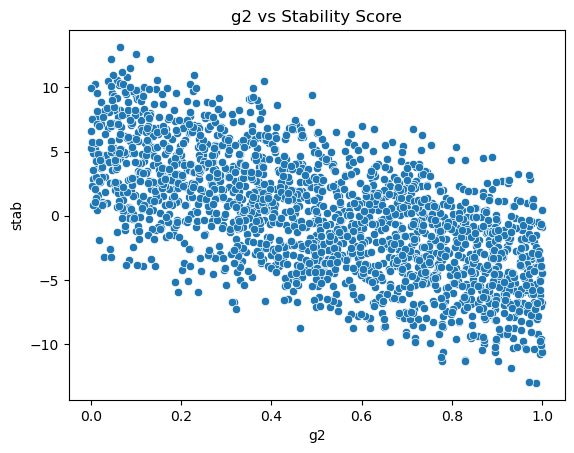

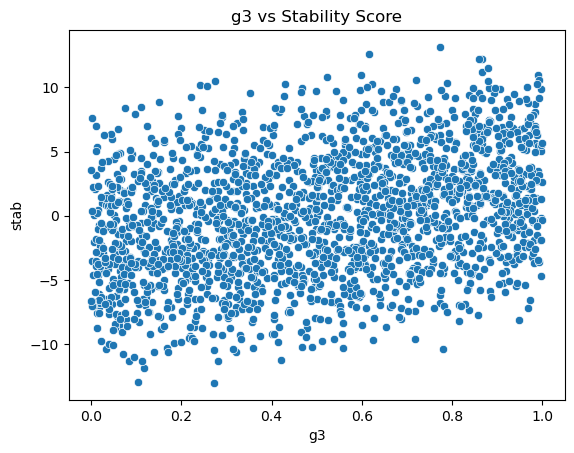

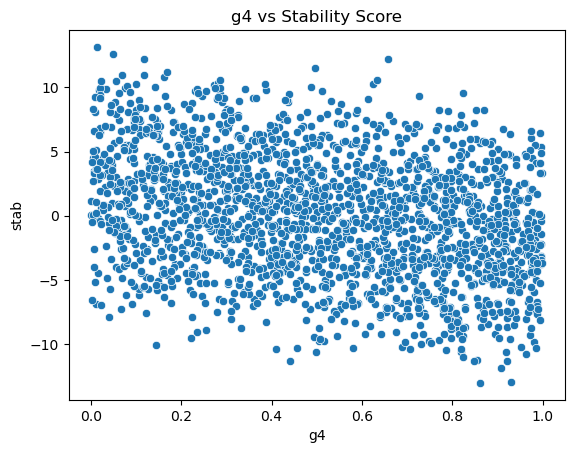

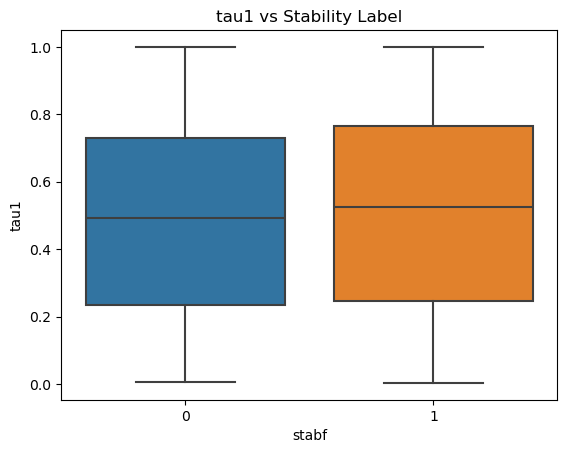

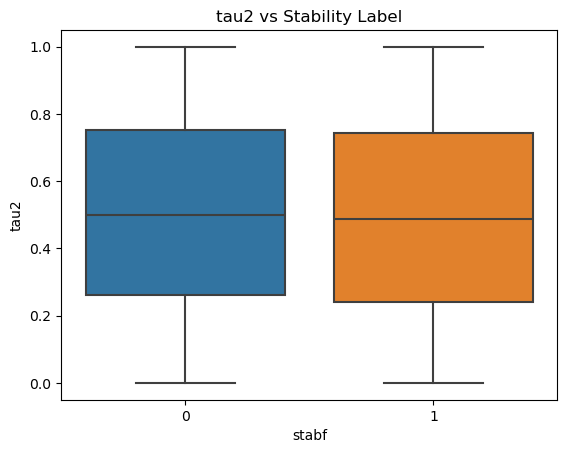

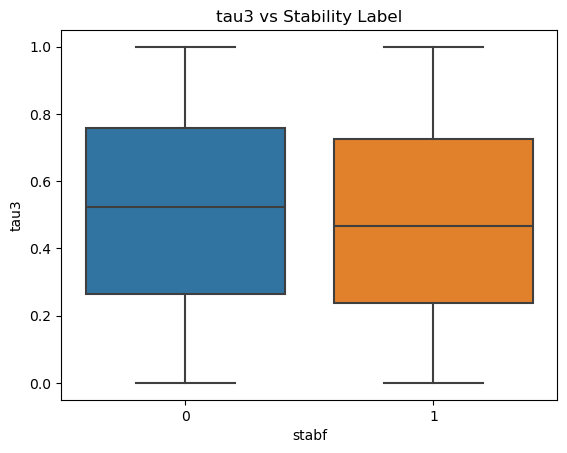

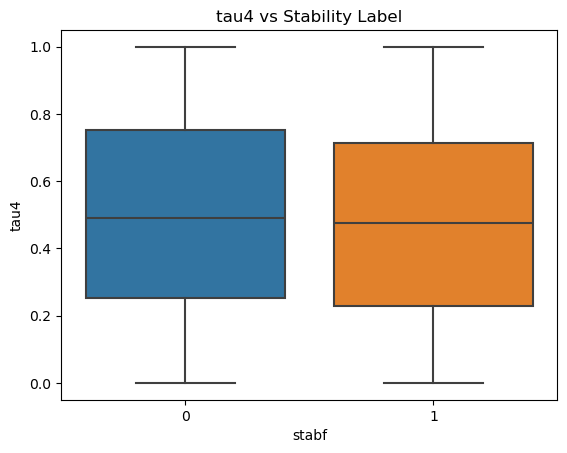

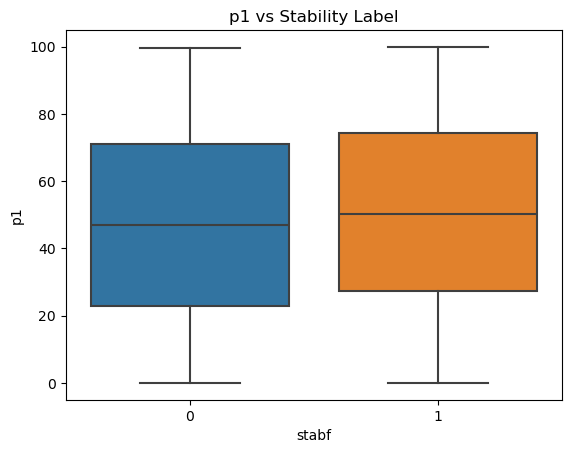

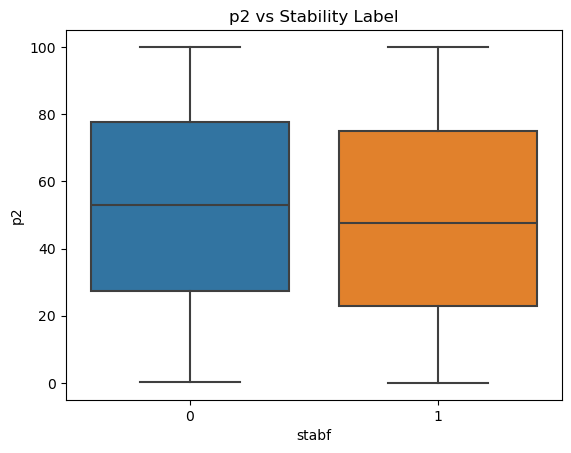

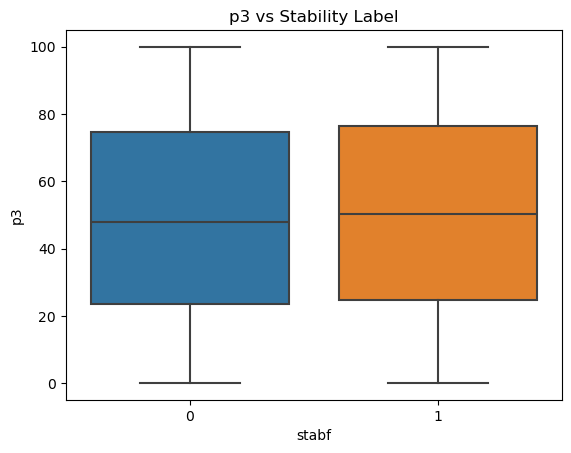

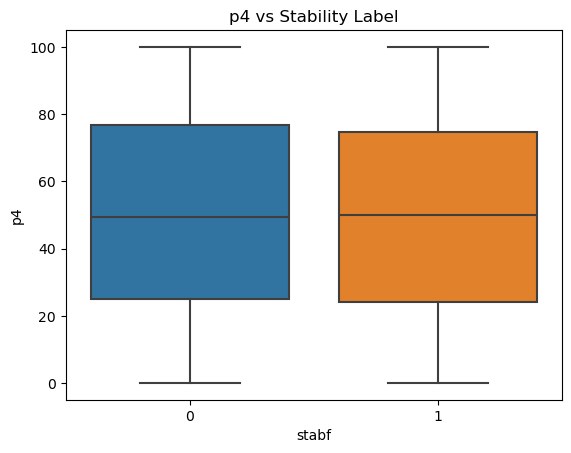

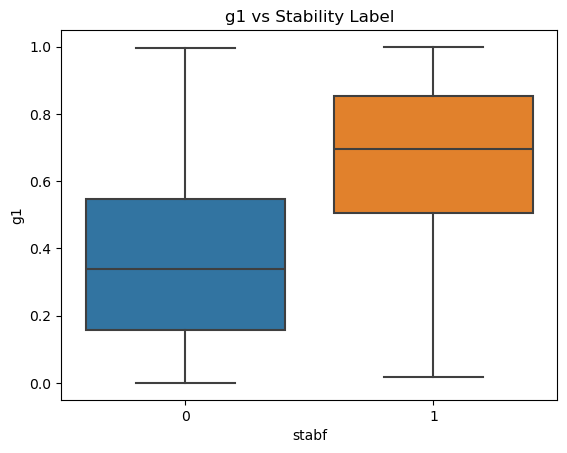

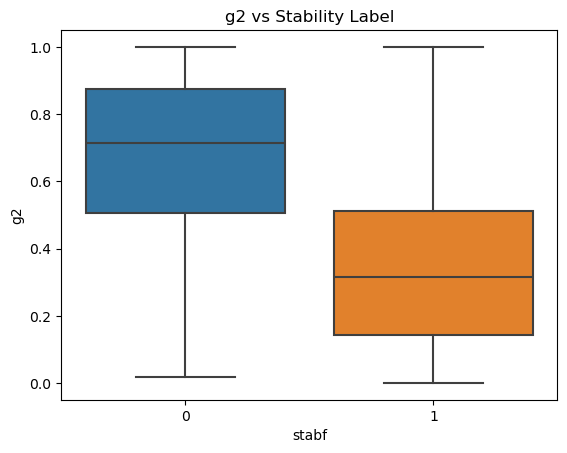

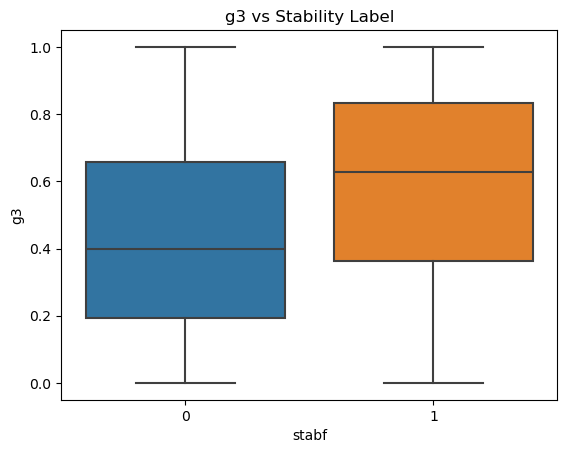

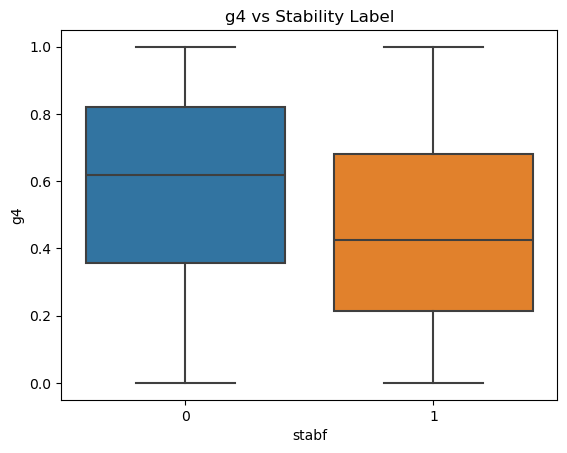

In [10]:
for column in df.columns[:-2]:  
    sns.scatterplot(x=df[column], y=df['stab'])
    plt.title(f'{column} vs Stability Score')
    plt.show()

for column in df.columns[:-2]:  
    sns.boxplot(x=df['stabf'], y=df[column])
    plt.title(f'{column} vs Stability Label')
    plt.show()


### Spliting the Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["stab","stabf"],axis=1)
y_stab = df["stab"]
y_stabf = df["stabf"]

X_train,X_test,y_stab_train,y_stab_test = train_test_split(X,y_stab,test_size=0.2)
X_train,X_test,y_stabf_train,y_stabf_test = train_test_split(X,y_stabf,test_size=0.2)

print(f"Shapes:\n\
      X_train : {X_train.shape},\n\
      X_test: {X_test.shape},\n\
      y_stab_train: {y_stab_train.shape},\n\
      y_stab_test: {y_stab_test.shape},\n\
      y_stabf_train:{y_stabf_train.shape},\n\
      y_stabf_test: {y_stabf_test.shape}\n\
")

Shapes:
      X_train : (1600, 12),
      X_test: (400, 12),
      y_stab_train: (1600,),
      y_stab_test: (400,),
      y_stabf_train:(1600,),
      y_stabf_test: (400,)



### Importing Models

In [12]:
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error

### Utility Function

In [27]:
accuracy_dict = {}
error_dict = {}

def find_classification_metrics(model,X_test,y_test):
    y_hat = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_hat)
    print(f"Accuracy:{accuracy}")
    print(confusion_matrix(y_test,y_hat))
    return accuracy

def find_regression_metrics(model,X_test,y_test):
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test,y_hat)
    print(f"Mean Squared Error :{mse}")
    return mse

def plot_result(accuracy_list):
    ...

### Support Vector Classifier with rbf Kernel

In [28]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X_train,y_stabf_train)

accuracy = find_classification_metrics(svc_model,X_test,y_stabf_test)
accuracy_dict["SVC (rbf)"] = accuracy

Accuracy:0.5475
[[125  91]
 [ 90  94]]


### Support Vector Classifier with Sigmoid Kernel

In [29]:
svc_model = SVC(kernel="sigmoid")
svc_model.fit(X_train,y_stabf_train)

accuracy = find_classification_metrics(svc_model,X_test,y_stabf_test)
accuracy_dict["SVC (Sigmoid)"] = accuracy

Accuracy:0.495
[[117  99]
 [103  81]]


### Support Vector Classifier with Linear Kernel

In [30]:
svc_model = SVC(kernel="linear")
svc_model.fit(X_train,y_stabf_train)

accuracy = find_classification_metrics(svc_model,X_test,y_stabf_test)
accuracy_dict["SVC (Linear)"] = accuracy

Accuracy:0.9825
[[212   4]
 [  3 181]]


### Decision Tree Classifier

In [31]:
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_model.fit(X_train,y_stabf_train)

accuracy = find_classification_metrics(decision_tree_classifier_model,X_test,y_stabf_test)
accuracy_dict["Decision Tree"] = accuracy

Accuracy:0.8925
[[195  21]
 [ 22 162]]


### K-Near Neighbours Classifier

In [32]:
knn_classifier_model = KNeighborsClassifier(n_neighbors=2)
knn_classifier_model.fit(X_train,y_stabf_train)

accuracy = find_classification_metrics(knn_classifier_model,X_test,y_stabf_test)
accuracy_dict["KNN"] = accuracy

Accuracy:0.5025
[[155  61]
 [138  46]]


### Accuracies

In [33]:
accuracy_dict

{'SVC (rbf)': 0.5475,
 'SVC (Sigmoid)': 0.495,
 'SVC (Linear)': 0.9825,
 'Decision Tree': 0.8925,
 'KNN': 0.5025}

### Support Vector Regressor with rbf Kernel

In [34]:
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train,y_stab_train)

error = find_regression_metrics(svr_model,X_test,y_stab_test)
error_dict["SVC (rbf)"] = error

Mean Squared Error :22.45963705787905


### Support Vector Regressor with Sigmoid Kernel

In [35]:
svr_model = SVR(kernel="sigmoid")
svr_model.fit(X_train,y_stab_train)

error = find_regression_metrics(svr_model,X_test,y_stab_test)
error_dict["SVC (Sigmoid)"] = error

Mean Squared Error :276.97883774082453


### Support Vectort Regressor with Linear Kernel

In [36]:
svr_model = SVR(kernel="linear")
svr_model.fit(X_train,y_stab_train)

error = find_regression_metrics(svr_model,X_test,y_stab_test)
error_dict["SVC (Linear)"] = error

Mean Squared Error :22.22293774483105


### Decision Tree Regressor

In [37]:
decision_tree_regression_model = DecisionTreeRegressor()
decision_tree_regression_model.fit(X_train,y_stab_train)

error = find_regression_metrics(decision_tree_regression_model,X_test,y_stab_test)
error_dict["Decision Tree"] = error

Mean Squared Error :45.08156896856378


### K-Near Neighbors Regressor

In [38]:
knn_regression_model = KNeighborsRegressor()
knn_regression_model.fit(X_train,y_stab_train)

error = find_regression_metrics(knn_regression_model,X_test,y_stab_test)
error_dict["KNN"] = error


Mean Squared Error :25.95213073012849


### Metrics

In [39]:
error_dict

{'SVC (rbf)': 22.45963705787905,
 'SVC (Sigmoid)': 276.97883774082453,
 'SVC (Linear)': 22.22293774483105,
 'Decision Tree': 45.08156896856378,
 'KNN': 25.95213073012849}

## RESULT

In [41]:
accuracy_series = pd.Series(accuracy_dict)
error_series = pd.Series(error_dict)

comparison_df = pd.DataFrame({'Classification': accuracy_series, 'Regression': error_series})

print(comparison_df.head())

               Classification  Regression
SVC (rbf)              0.5475   22.459637
SVC (Sigmoid)          0.4950  276.978838
SVC (Linear)           0.9825   22.222938
Decision Tree          0.8925   45.081569
KNN                    0.5025   25.952131


`From the above table, I'm concluding that Support Vector Machine with Linear Kernel Gives Best Result`